In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
tweets=pd.read_csv("twitter_training.csv", names=["id", "Entity", "Sentiment", "Content"],)

In [3]:
tweets.head()

,id,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74682 non-null  int64 
 1   Entity     74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Content    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [5]:
tweets=tweets.dropna()

In [6]:
tweets["Sentiment"].value_counts()/73996

Negative      0.302151
Positive      0.279137
Neutral       0.244716
Irrelevant    0.173996
Name: Sentiment, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

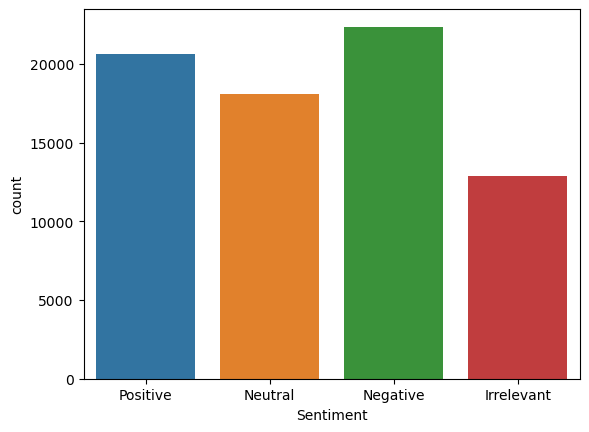

In [9]:
sns.countplot(tweets["Sentiment"])

In [635]:
inst=pd.crosstab(tweets["Entity"], tweets["Sentiment"])

In [636]:
sums=inst.sum(axis=1)

In [637]:
freq_table=inst.div(sums, axis=0)

In [638]:
freq_table

Sentiment,Irrelevant,Negative,Neutral,Positive
Entity,,,,
Amazon,0.081722,0.252636,0.530316,0.135325
ApexLegends,0.081598,0.251169,0.397790,0.269443
AssassinsCreed,0.118174,0.167860,0.069830,0.644136
Battlefield,0.395078,0.200345,0.151554,0.253022
Borderlands,0.105263,0.186842,0.261842,0.446053
CS-GO,0.276708,0.150613,0.239930,0.332750
CallOfDuty,0.282828,0.371633,0.157828,0.187710
CallOfDutyBlackopsColdWar,0.242851,0.241571,0.150235,0.365344
Cyberpunk2077,0.205570,0.170203,0.204244,0.419982


In [639]:
freq_table.max()

Sentiment
Irrelevant    0.400627
Negative      0.712663
Neutral       0.530316
Positive      0.644136
dtype: float64

In [640]:
freq_table[freq_table["Irrelevant"]>0.40]

Sentiment,Irrelevant,Negative,Neutral,Positive
Entity,,,,
PlayerUnknownsBattlegrounds(PUBG),0.400627,0.303491,0.117726,0.178156


In [641]:
freq_table[freq_table["Negative"]>0.71]

Sentiment,Irrelevant,Negative,Neutral,Positive
Entity,,,,
MaddenNFL,0.037863,0.712663,0.082878,0.166597


In [642]:
freq_table[freq_table["Neutral"]>0.53]

Sentiment,Irrelevant,Negative,Neutral,Positive
Entity,,,,
Amazon,0.081722,0.252636,0.530316,0.135325


In [643]:
freq_table[freq_table["Positive"]>0.64]

Sentiment,Irrelevant,Negative,Neutral,Positive
Entity,,,,
AssassinsCreed,0.118174,0.16786,0.06983,0.644136


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Entity', ylabel='count'>

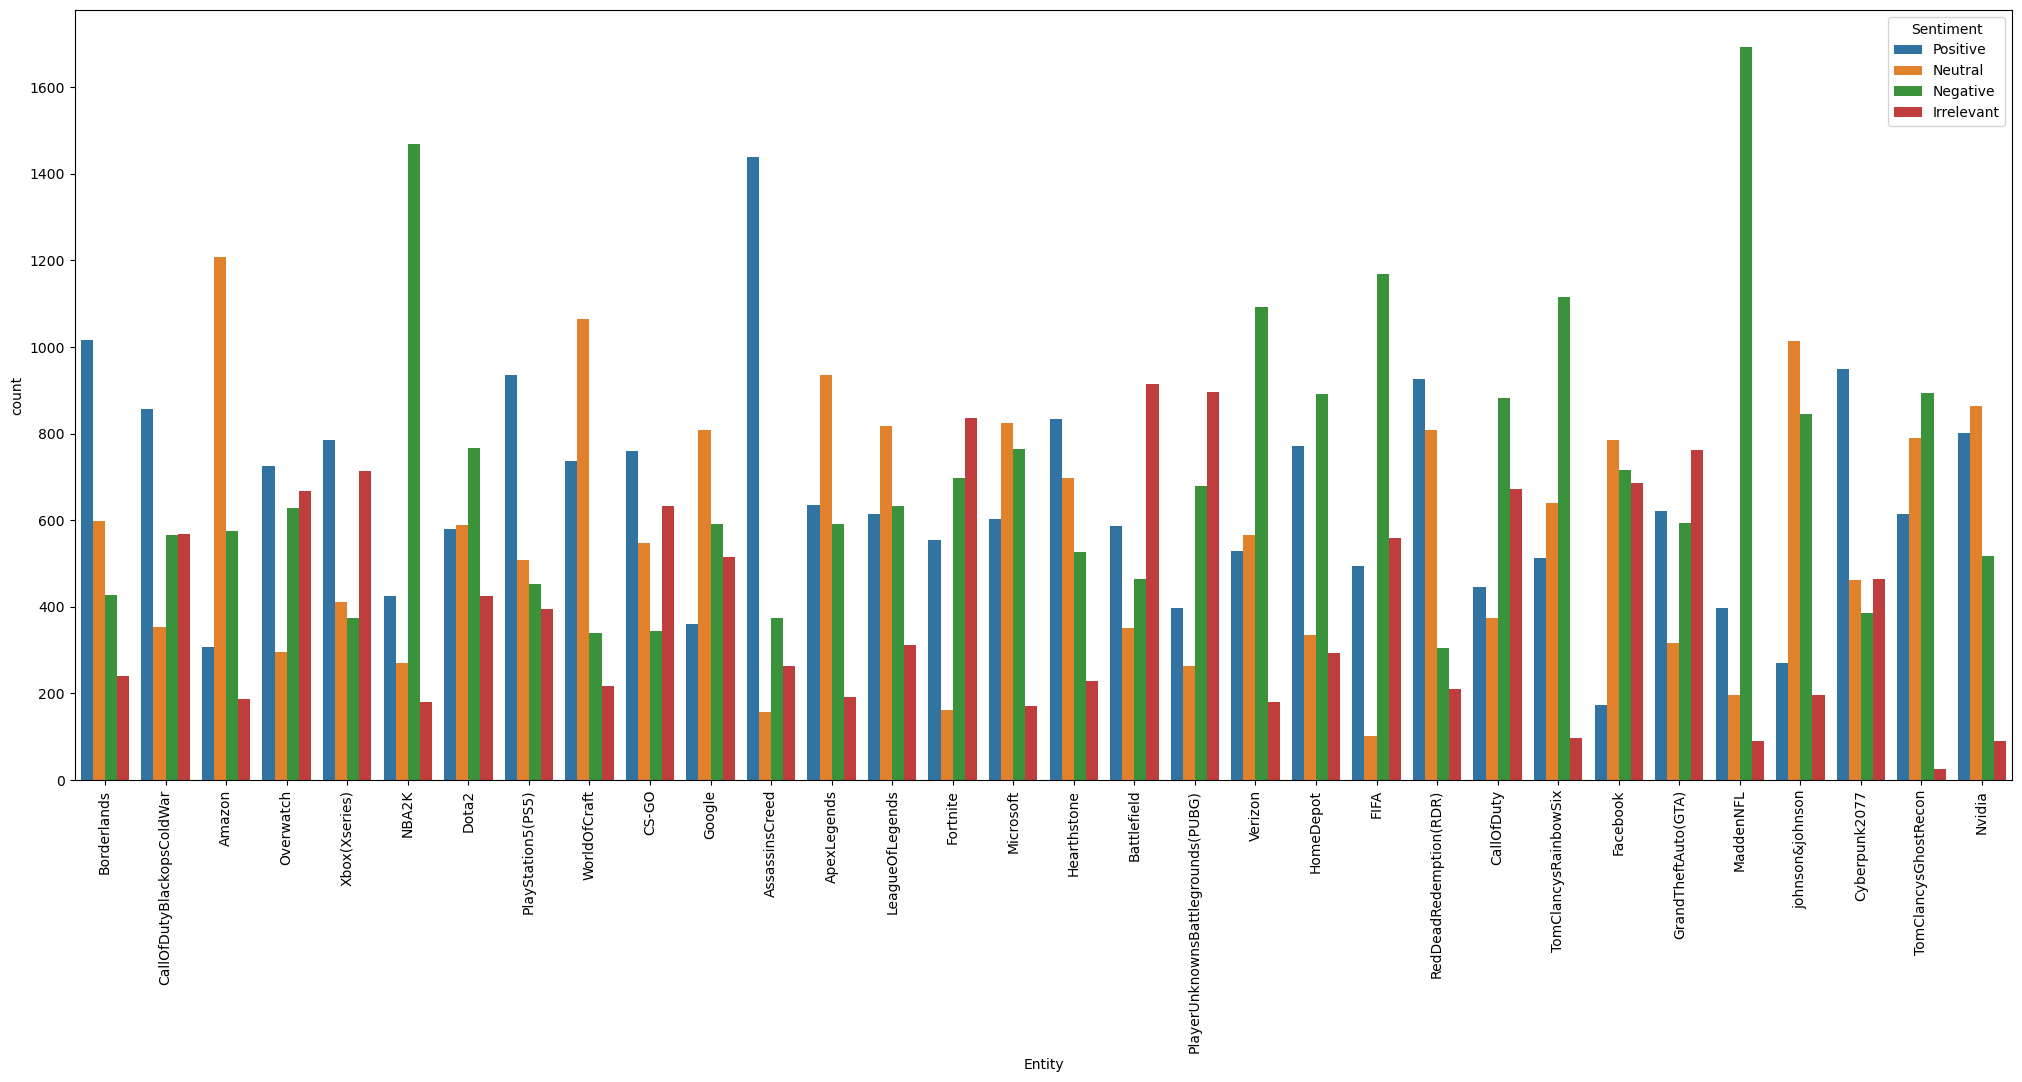

In [408]:
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
sns.countplot("Entity", hue="Sentiment", data=tweets)

In [502]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1000 non-null   int64 
 1   Entity     1000 non-null   object
 2   Sentiment  1000 non-null   object
 3   Content    1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [644]:
lnth=tweets["Content"].apply(lambda a: len(a))

In [645]:
tweets["lnth"]=lnth

<AxesSubplot:xlabel='lnth', ylabel='Count'>

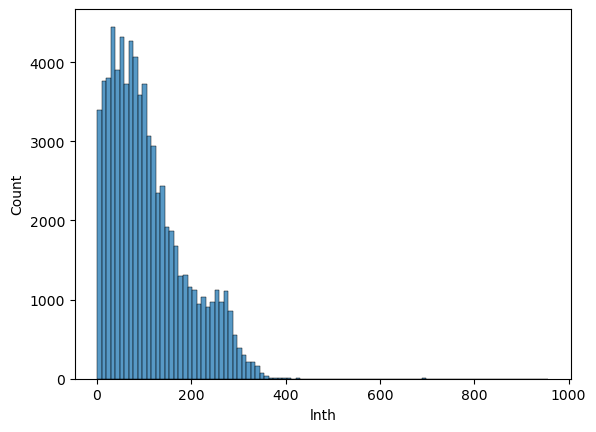

In [646]:
sns.histplot(tweets["lnth"], bins=100)

array([[<AxesSubplot:title={'center':'Irrelevant'}>,
        <AxesSubplot:title={'center':'Negative'}>],
       [<AxesSubplot:title={'center':'Neutral'}>,
        <AxesSubplot:title={'center':'Positive'}>]], dtype=object)

<Figure size 1200x2000 with 0 Axes>

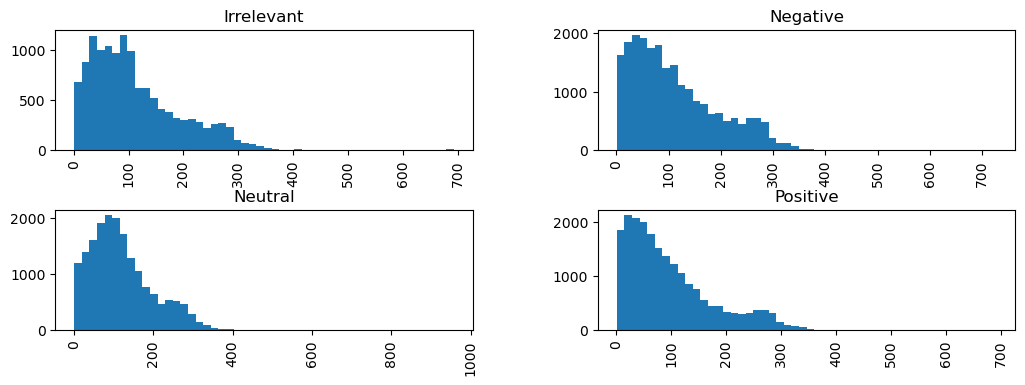

In [412]:
plt.figure(figsize=(12,20))
tweets.hist(column='lnth', by='Sentiment', bins=50,figsize=(12,4))

In [413]:
#looks like neutral and irrelevant tend to be little bit longer

In [414]:
tweets.groupby("Sentiment").mean()["lnth"]

Sentiment
Irrelevant    110.929476
Negative      111.285714
Neutral       118.834603
Positive       95.926168
Name: lnth, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lnth', ylabel='Sentiment'>

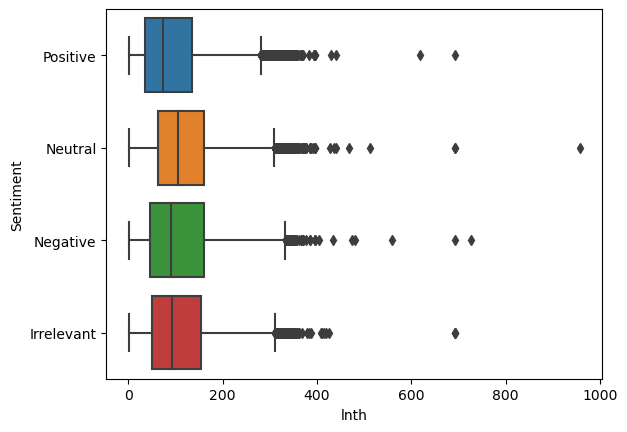

In [415]:
sns.boxplot("lnth", "Sentiment", data=tweets)

In [416]:
#let's see if this is a significant difference

In [417]:
import scipy.stats as stats
group1=tweets[tweets["Sentiment"]=="Irrelevant"]["lnth"]
group2=tweets[tweets["Sentiment"]=="Neutral"]["lnth"]
group3=tweets[tweets["Sentiment"]=="Negative"]["lnth"]
group4=tweets[tweets["Sentiment"]=="Positive"]["lnth"]

statistic, p_value = stats.kruskal(group1, group2, group3, group4)

print('Kruskal-Wallis test:')
print('H statistic:', statistic)
print('p-value:', p_value)

Kruskal-Wallis test:
H statistic: 1231.62299089274
p-value: 1.0092454064726823e-266


In [418]:
#it seems that we can reject the null hypothesis H0: Population medians are equal. So we will use it as a feature

_________________________________________________________

## SENTIMENT ANALYSIS

In [647]:
import nltk

In [648]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [649]:
tweets["Content"][0]

'im getting on borderlands and i will murder you all ,'

In [650]:
import contractions

In [651]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [652]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

words = nltk.word_tokenize(sentence)


In [653]:
def text_process(tweet):
  
    #Expand texts from contractions
    expanded = contractions.fix(tweet)
    
    # Check characters to see if they are in punctuation
    nopunc = [char for char in expanded if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    clean_token=[word.lower() for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    # Lemmatize
    return [lemmatizer.lemmatize(word) for word in clean_token]

In [654]:
sentence = "The cats are playing with the mice"
text_process(sentence)

['cat', 'playing', 'mouse']

In [655]:
tweets['Content'].head(5).apply(text_process)

0       [getting, borderland, murder]
1              [coming, border, kill]
2         [getting, borderland, kill]
3        [coming, borderland, murder]
4    [getting, borderland, 2, murder]
Name: Content, dtype: object

In [802]:
from wordcloud import WordCloud

data_neg = tweets[tweets['Sentiment']=="Negative"]["Content"]
data_neg= data_neg.apply(lambda a: " ".join(text_process(a)))

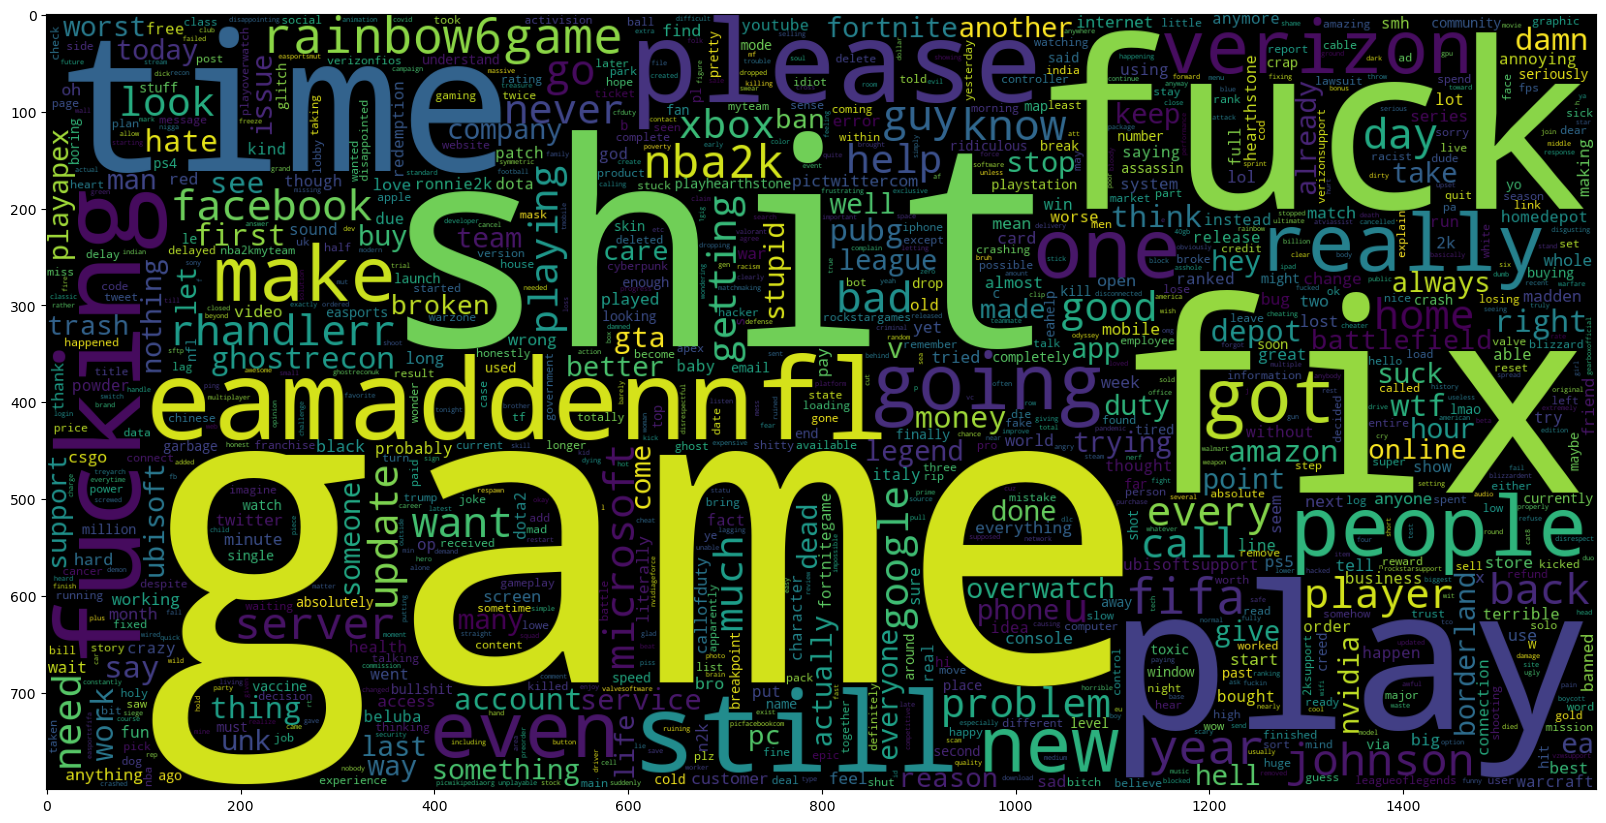

In [803]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

In [804]:
data_pos = tweets[tweets['Sentiment']=="Positive"]["Content"]
data_pos= data_pos.apply(lambda a: " ".join(text_process(a)))

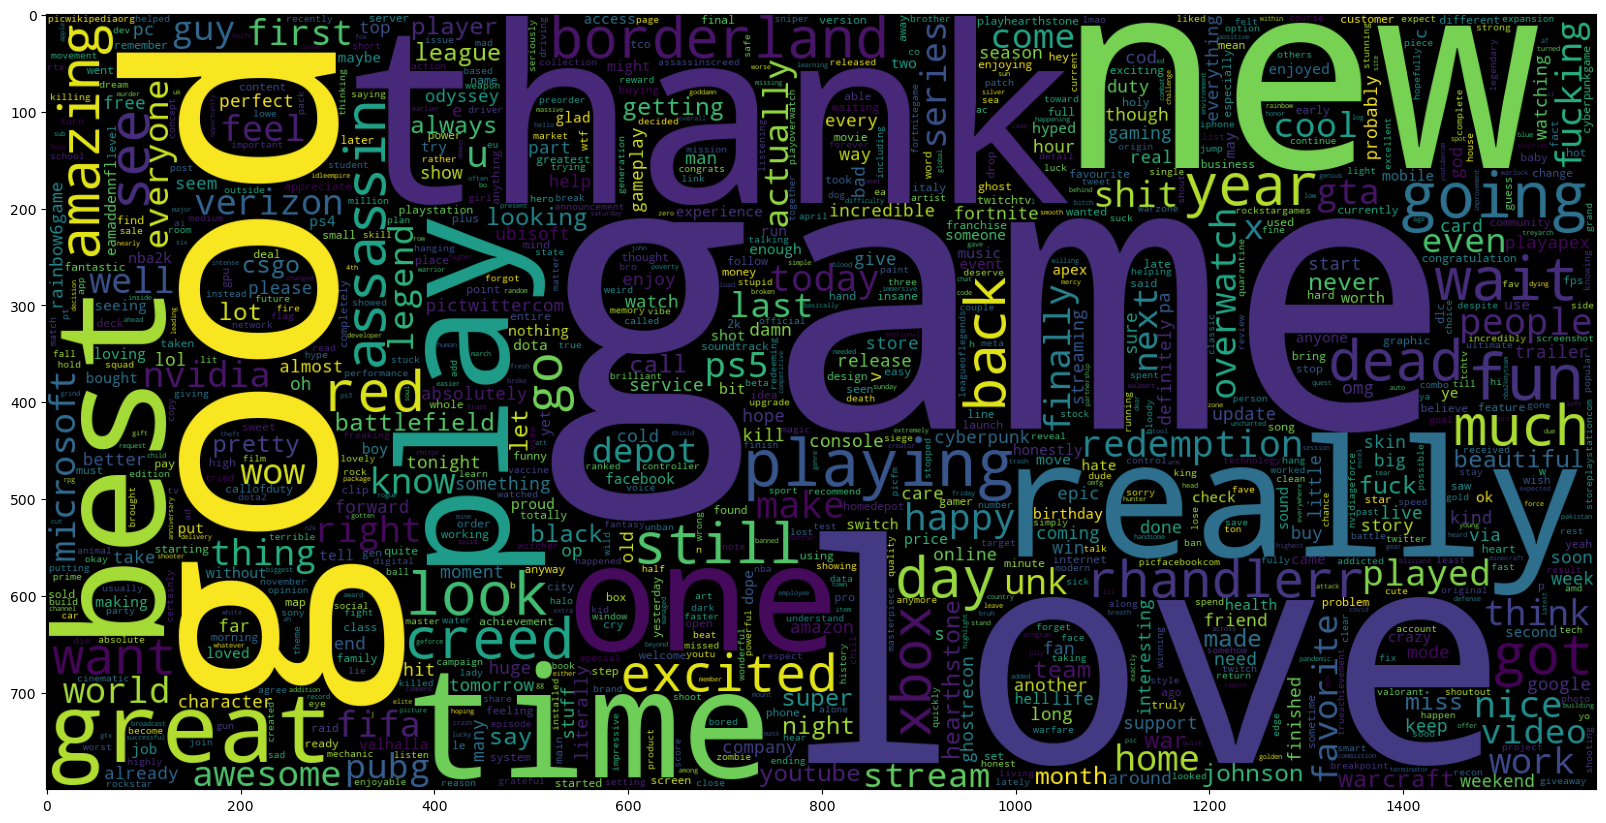

In [805]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_pos))
plt.imshow(wc)

________________________________________________

### Transformation in case working with EMOJIS:

In [281]:
def extract_emojis(text):
    emojis = re.findall(r'[^\w\s,]', text)
    return emojis

def get_emoji_sentiment_score(emoji):
    sentiment_scores = sid.polarity_scores(emoji)
    return sentiment_scores['compound']


In [282]:
for i, tweet in enumerate(tweets["Content"]):
    emojis = extract_emojis(tweet)
    
    if emojis:
        compound_scores = [get_emoji_sentiment_score(emoji) for emoji in emojis]
        tweets.at[i, 'compound_emoji'] = sum(compound_scores) / len(compound_scores)
    else:
        tweets.at[i, 'compound_emoji'] = 0.0

In [284]:
extract_emojis(tweets["Content"][0])

['’', '‘', '’', '’', '’', '🤣']

In [ ]:
#not good

_________________________________________________________________

In [762]:
from nltk.sentiment import SentimentIntensityAnalyzer
import emoji

sid = SentimentIntensityAnalyzer()

In [763]:
#test
#extract only the text
import emoji

# Example sentence with emojis
text = tweets["Content"][0]

# Convert emojis to text
text_with_emojis_as_text = emoji.demojize(text)

shortcode_regex = r":(\w+):"
shortcodes = re.findall(shortcode_regex, text_with_emojis_as_text)

print("Original Text:", text)
print("Extracted Shortcodes:", shortcodes)


Original Text: im getting on borderlands and i will murder you all ,
Extracted Shortcodes: []


In [764]:
def get_em_emojis(text):
    text_with_emojis_as_text = emoji.demojize(text)
    shortcode_regex = r":(\w+):"
    shortcodes = re.findall(shortcode_regex, text_with_emojis_as_text)
    return ", ".join(shortcodes)  # Join the shortcodes into a single string

In [765]:
valid["emoji text"] = valid["Content"].apply(get_em_emojis)

In [766]:
valid

,id,Entity,Sentiment,Content,emoji text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,rolling_on_the_floor_laughing
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,face_with_rolling_eyes
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",
4,4433,Google,Neutral,Now the President is slapping Americans in the...,
...,...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...,star
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...,
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.,


In [767]:
def emoji_process(tweet):
    
    # Check characters to see if they are in punctuation
    nopunc = tweet.replace("_", " ")

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    clean_token=[word.lower() for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    # Lemmatize
    return [lemmatizer.lemmatize(word) for word in clean_token]

In [768]:
emoji_process(valid["emoji text"][0])

['rolling', 'floor', 'laughing']

In [771]:
valid["emoji text"]= valid["emoji text"].apply(lambda a: " ".join(emoji_process(a)))

In [772]:
valid["content n emoji"]=valid["Content"]+" "+valid["emoji text"]

In [773]:
valid["content n emoji"][0]

'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣 rolling floor laughing'

In [774]:
def remove_emojis(text):
    clean_text = re.sub(r'[^\w\s\d]', '', text)
    return clean_text

# Apply the function to the Series variable
valid["clean content"] = valid["content n emoji"].apply(lambda a: remove_emojis(a))

In [775]:
valid["clean content"][0]

'I mentioned on Facebook that I was struggling for motivation to go for a run the other day which has been translated by Toms great auntie as Hayley cant get out of bed and told to his grandma who now thinks Im a lazy terrible person  rolling floor laughing'

In [776]:
valid.drop(["content n emoji", "emoji text"], axis=1, inplace=True,)

### Create BAG OF WORDS

In [437]:
#subset=tweets[tweets["Sentiment"]!="Irrelevant"]

In [719]:
from sklearn.feature_extraction.text import CountVectorizer

In [720]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(tweets['Content'])

In [721]:
tweet_bow = bow_transformer.transform(tweets['Content'])

In [616]:
print(len(bow_transformer.vocabulary_))

5046


In [617]:
#test

In [619]:
tweet1=tweets["clean content"][0]
tweet1

'I mentioned on Facebook that I was struggling for motivation to go for a run the other day which has been translated by Toms great auntie as Hayley cant get out of bed and told to his grandma who now thinks Im a lazy terrible person  rolling floor laughing'

In [620]:
bow1 = bow_transformer.transform([tweet1])
print(bow1)
print(bow1.shape)

  (0, 423)	1
  (0, 512)	1
  (0, 743)	1
  (0, 1108)	1
  (0, 1471)	1
  (0, 1595)	1
  (0, 1761)	1
  (0, 1797)	1
  (0, 1831)	1
  (0, 1840)	1
  (0, 1919)	1
  (0, 2451)	1
  (0, 2456)	1
  (0, 2693)	1
  (0, 2821)	1
  (0, 3172)	1
  (0, 3806)	1
  (0, 3837)	1
  (0, 4273)	1
  (0, 4416)	1
  (0, 4449)	1
  (0, 4507)	1
  (0, 4508)	1
  (0, 4541)	1
(1, 5046)


In [152]:
print(bow_transformer.get_feature_names()[764])
print(bow_transformer.get_feature_names()[6224])

Facebook
🤣


### TF-IDF

In [722]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(tweet_bow)
#tfidf1 = tfidf_transformer.transform(bow1)
#print(tfidf1)

In [723]:
tweets_tfidf = tfidf_transformer.transform(tweet_bow)
print(tweets_tfidf.shape)

(73996, 39511)


### MODEL

1. TF-IDF Representation: First, the text documents are transformed into a TF-IDF table. TF-IDF represents the importance of a term in a document by considering both its frequency (TF) and rarity in the entire corpus (IDF).

2. Training Phase: During the training phase, Naive Bayes learns the statistical properties of the TF-IDF table. It calculates the probabilities of each term occurring in each class. It also estimates the prior probabilities of each class.

3. Feature Selection: Naive Bayes can use all the features (terms) in the TF-IDF table or apply feature selection techniques to select the most informative features.

4. Classification Phase: When classifying new documents, Naive Bayes utilizes the TF-IDF values of the terms in the document. It calculates the conditional probability of the document belonging to each class given the observed TF-IDF values.

5. Naive Bayes Assumption: Naive Bayes assumes independence between features (terms) given the class label. This means it assumes that the occurrence of a particular term in a document is independent of the occurrence of other terms, given the class label.

6. Class Prediction: Using Bayes' theorem, Naive Bayes computes the posterior probability of each class for the document based on the observed TF-IDF values. The class with the highest posterior probability is assigned as the predicted class for the document.



In [724]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [727]:
lnth_array = tweets['lnth'].values.reshape((-1, 1))

In [728]:
lnth_array.shape

(73996, 1)

In [729]:
# Combine TF-IDF matrix with "lnth" column
combined_features = np.hstack((tweets_tfidf.toarray(), lnth_array))

In [730]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_features, tweets['Sentiment'], test_size=0.2, random_state=42)

In [740]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB(alpha=0.1,fit_prior=False)
nb_classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1, fit_prior=False)

In [741]:
# Predict the sentiment of the testing data
y_pred = nb_classifier.predict(X_test)

In [742]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.8006081081081081
Precision: 0.8010572170268861
Recall: 0.8006081081081081
F1-Score: 0.8002432869618494


In [ ]:
#pipeline = Pipeline([
#    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
#    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
#    ('classifier', MultinomialNB(alpha=0.1, fit_prior=False)),  # train on TF-IDF vectors w/ Naive Bayes classifier
#])

In [759]:
valid=pd.read_csv("twitter_validation.csv", names=["id", "Entity", "Sentiment", "Content"],)

In [ ]:
#transformation using the emoji functions

In [777]:
valid_bow = bow_transformer.transform(valid['clean content'])

In [778]:
valid_tfidf = tfidf_transformer.transform(valid_bow)

In [779]:
valid["lnth"]=valid["Content"].apply(lambda a: len(a))

In [780]:
valid_lnth_array = valid['lnth'].values.reshape((-1, 1))
combined_features_valid = np.hstack((valid_tfidf.toarray(), valid_lnth_array))

In [782]:
y=valid["Sentiment"]

In [783]:
y_pred = nb_classifier.predict(combined_features_valid)

In [785]:
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.866
Precision: 0.8702778469201699
Recall: 0.866
F1-Score: 0.8657072514856838


In [314]:
#let's try with lexicon

In [786]:
subset=tweets[tweets["Sentiment"]!="Irrelevant"]
subset

,id,Entity,Sentiment,Content,lnth,emoji_score,clean content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53,0.0,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51,0.0,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50,0.0,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51,0.0,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57,0.0,im getting on borderlands 2 and i will murder ...
...,...,...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,128,0.0,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,117,0.0,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,125,0.0,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,159,0.0,Just realized between the windows partition of...


In [791]:
sentiment_scores = subset["clean content"].apply(lambda a: sid.polarity_scores(a))
subset["sentiment_score"]=sentiment_scores.apply(lambda a: a["compound"])

C:\Users\User\AppData\Local\Temp\ipykernel_17636\139388646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["sentiment_score"]=sentiment_scores.apply(lambda a: a["compound"])


In [793]:
subset

,id,Entity,Sentiment,Content,lnth,clean content,sentiment_score
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53,im getting on borderlands and i will murder yo...,-0.6908
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51,I am coming to the borders and I will kill you...,-0.6908
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50,im getting on borderlands and i will kill you ...,-0.6908
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51,im coming on borderlands and i will murder you...,-0.6908
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57,im getting on borderlands 2 and i will murder ...,-0.6908
...,...,...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,128,Just realized that the Windows partition of my...,0.0772
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,117,Just realized that my Mac window partition is ...,-0.2960
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,125,Just realized the windows partition of my Mac ...,-0.2960
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,159,Just realized between the windows partition of...,0.0772


In [794]:
pred = pd.Series(['Positive' if score >= 0.05 else 'Negative' if score <= -0.05 else 'Neutral' for score in subset["sentiment_score"]])

In [795]:
pred

0        Negative
1        Negative
2        Negative
3        Negative
4        Negative
           ...   
61116    Positive
61117    Negative
61118    Negative
61119    Positive
61120    Positive
Length: 61121, dtype: object

In [796]:
accuracy = accuracy_score(subset["Sentiment"], pred)
precision = precision_score(subset["Sentiment"], pred, average='weighted')
recall = recall_score(subset["Sentiment"], pred, average='weighted')
f1 = f1_score(subset["Sentiment"], pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.49840480358632877
Precision: 0.479609948735148
Recall: 0.49840480358632877
F1-Score: 0.4803392049209192


In [ ]:
#overall the ML model performs significantly better